In [29]:
import pandas as pd # for data analysis and manipulation
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from sklearn.model_selection import train_test_split # for splitting data into training and testing sets.
from sklearn.linear_model import LinearRegression, Ridge, Lasso # for regression models.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # for regression models.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # for evaluating model performance.


In [30]:
# Load the dataset
#  This code reads the dataset from a CSV file into a Pandas DataFrame, allowing for easy manipulation and analysis of the data.
file_path = r"C:\Users\DELL\Desktop\DSA 1060A\Group Project\archive\Mobile-Price-Prediction-cleaned_data.csv"
data = pd.read_csv(file_path)


In [31]:
# Data Exploration and Preprocessing
# 1. Data Cleaning
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())
# Handling missing data is crucial to ensure the quality and accuracy of the analysis.

Missing values in each column:
Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64


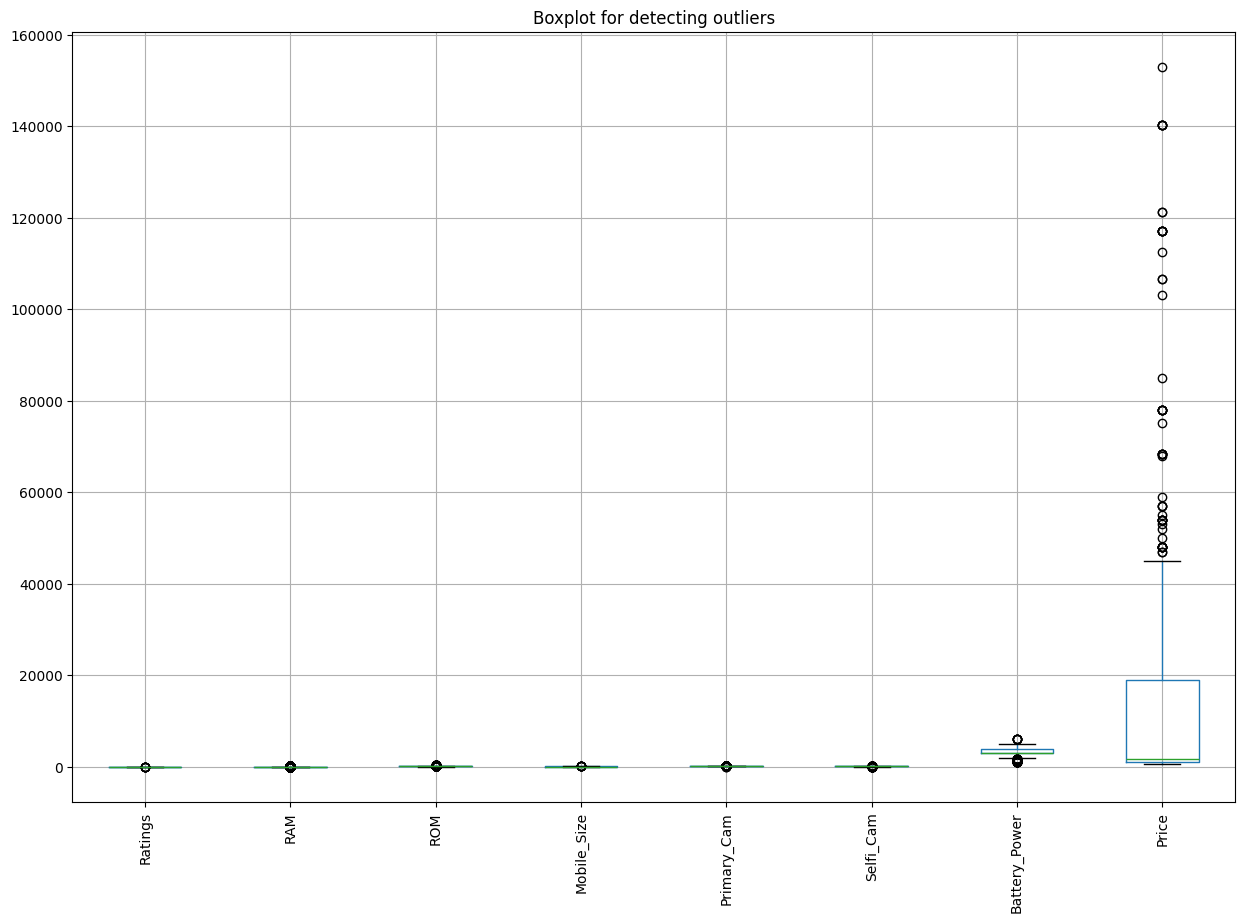

In [32]:
# Check for outliers using box plots
plt.figure(figsize=(15, 10))
data.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot for detecting outliers")
plt.show()

In [33]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(data.describe())


Descriptive Statistics:
          Ratings         RAM         ROM  Mobile_Size  Primary_Cam  \
count  807.000000  807.000000  807.000000   807.000000   807.000000   
mean     4.112639    5.941760   64.390335     5.620660    47.821561   
std      0.367830    2.056359   53.868626     3.957409    11.155916   
min      2.800000    0.000000    2.000000     2.000000     5.000000   
25%      3.900000    6.000000   32.000000     4.500000    48.000000   
50%      4.100000    6.000000   32.000000     4.770000    48.000000   
75%      4.400000    6.000000   64.000000     6.300000    48.000000   
max      4.800000   12.000000  256.000000    44.000000    64.000000   

        Selfi_Cam  Battery_Power          Price  
count  807.000000     807.000000     807.000000  
mean     8.868649    3278.859975   14269.167286  
std      4.547254     937.628801   23092.739983  
min      0.000000    1020.000000     479.000000  
25%      8.000000    3000.000000     984.000000  
50%      8.000000    3000.000000    

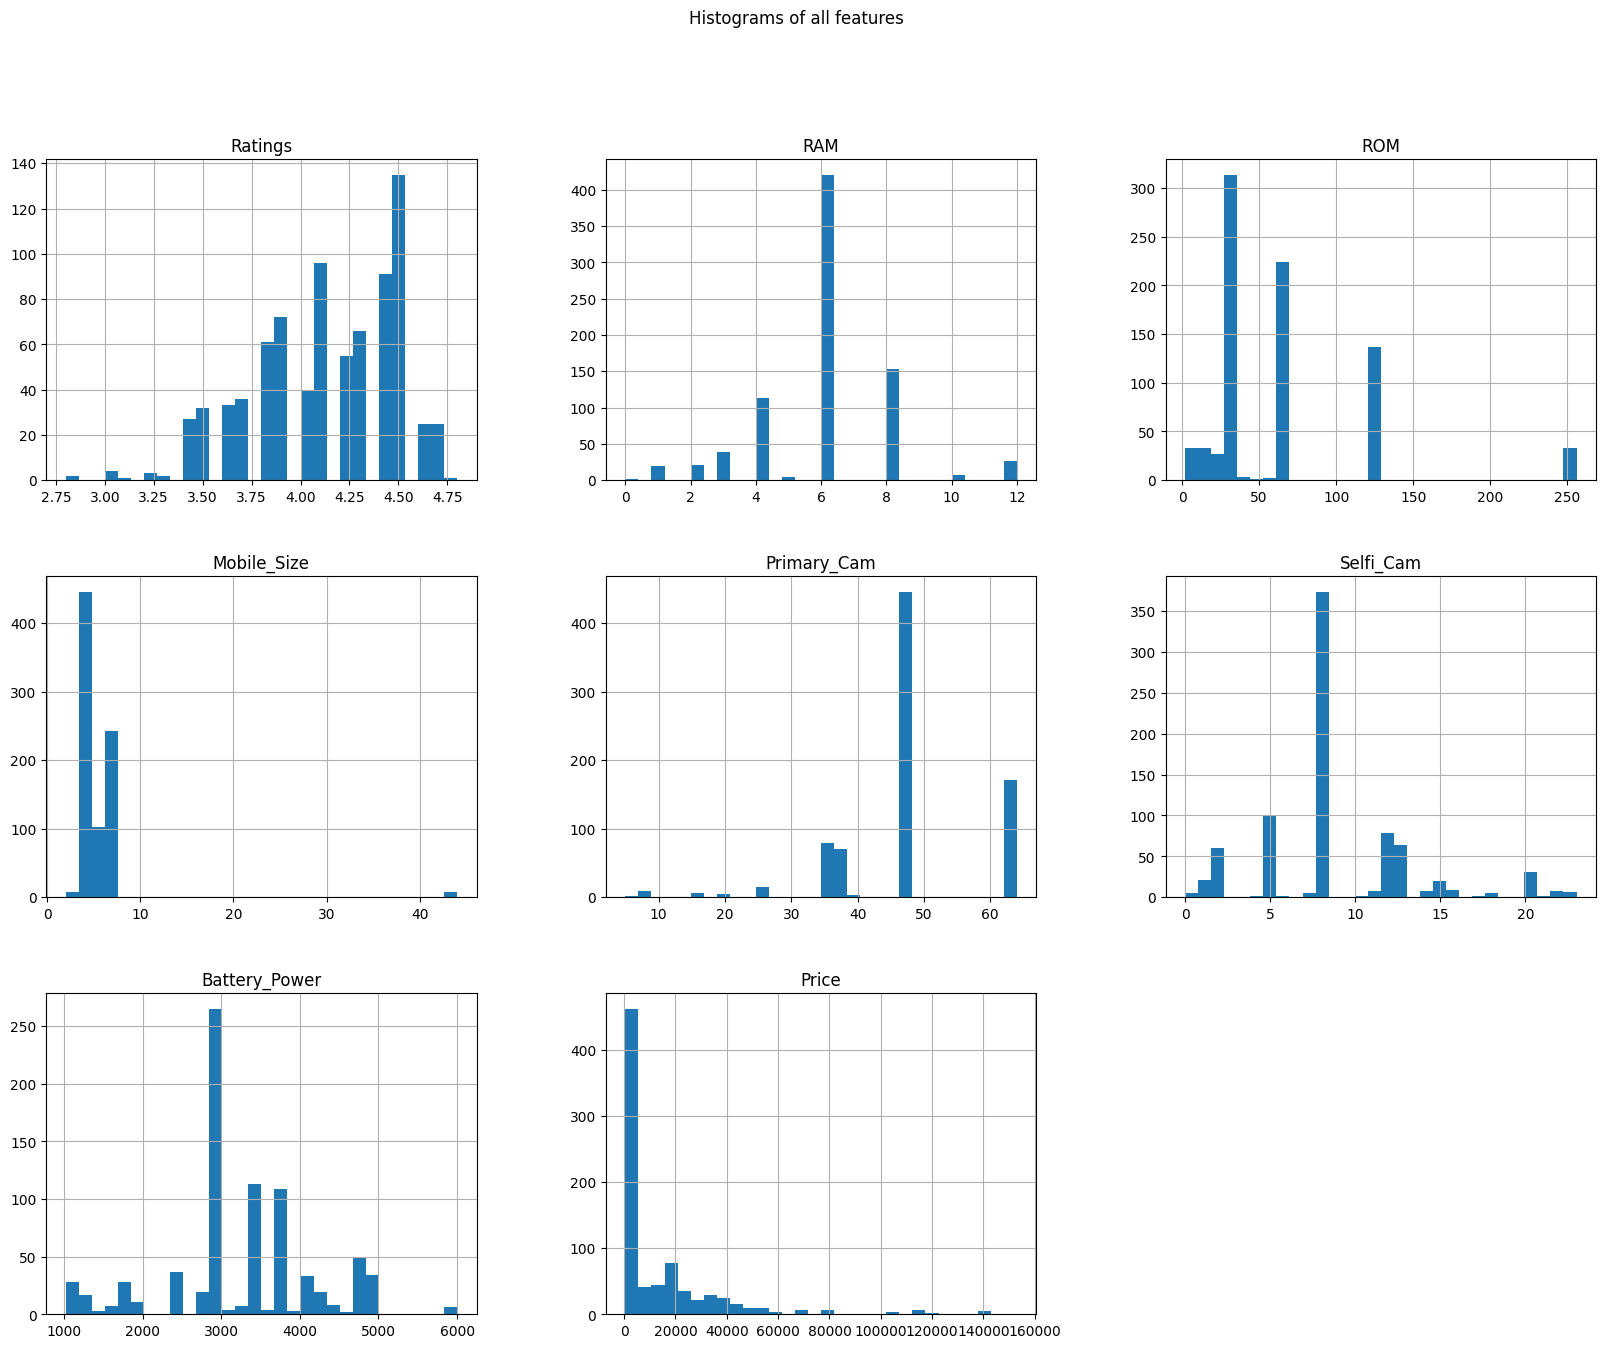

In [34]:
# Data Visualization
# Histograms
data.hist(bins=30, figsize=(20, 15))
plt.suptitle("Histograms of all features")
plt.show()

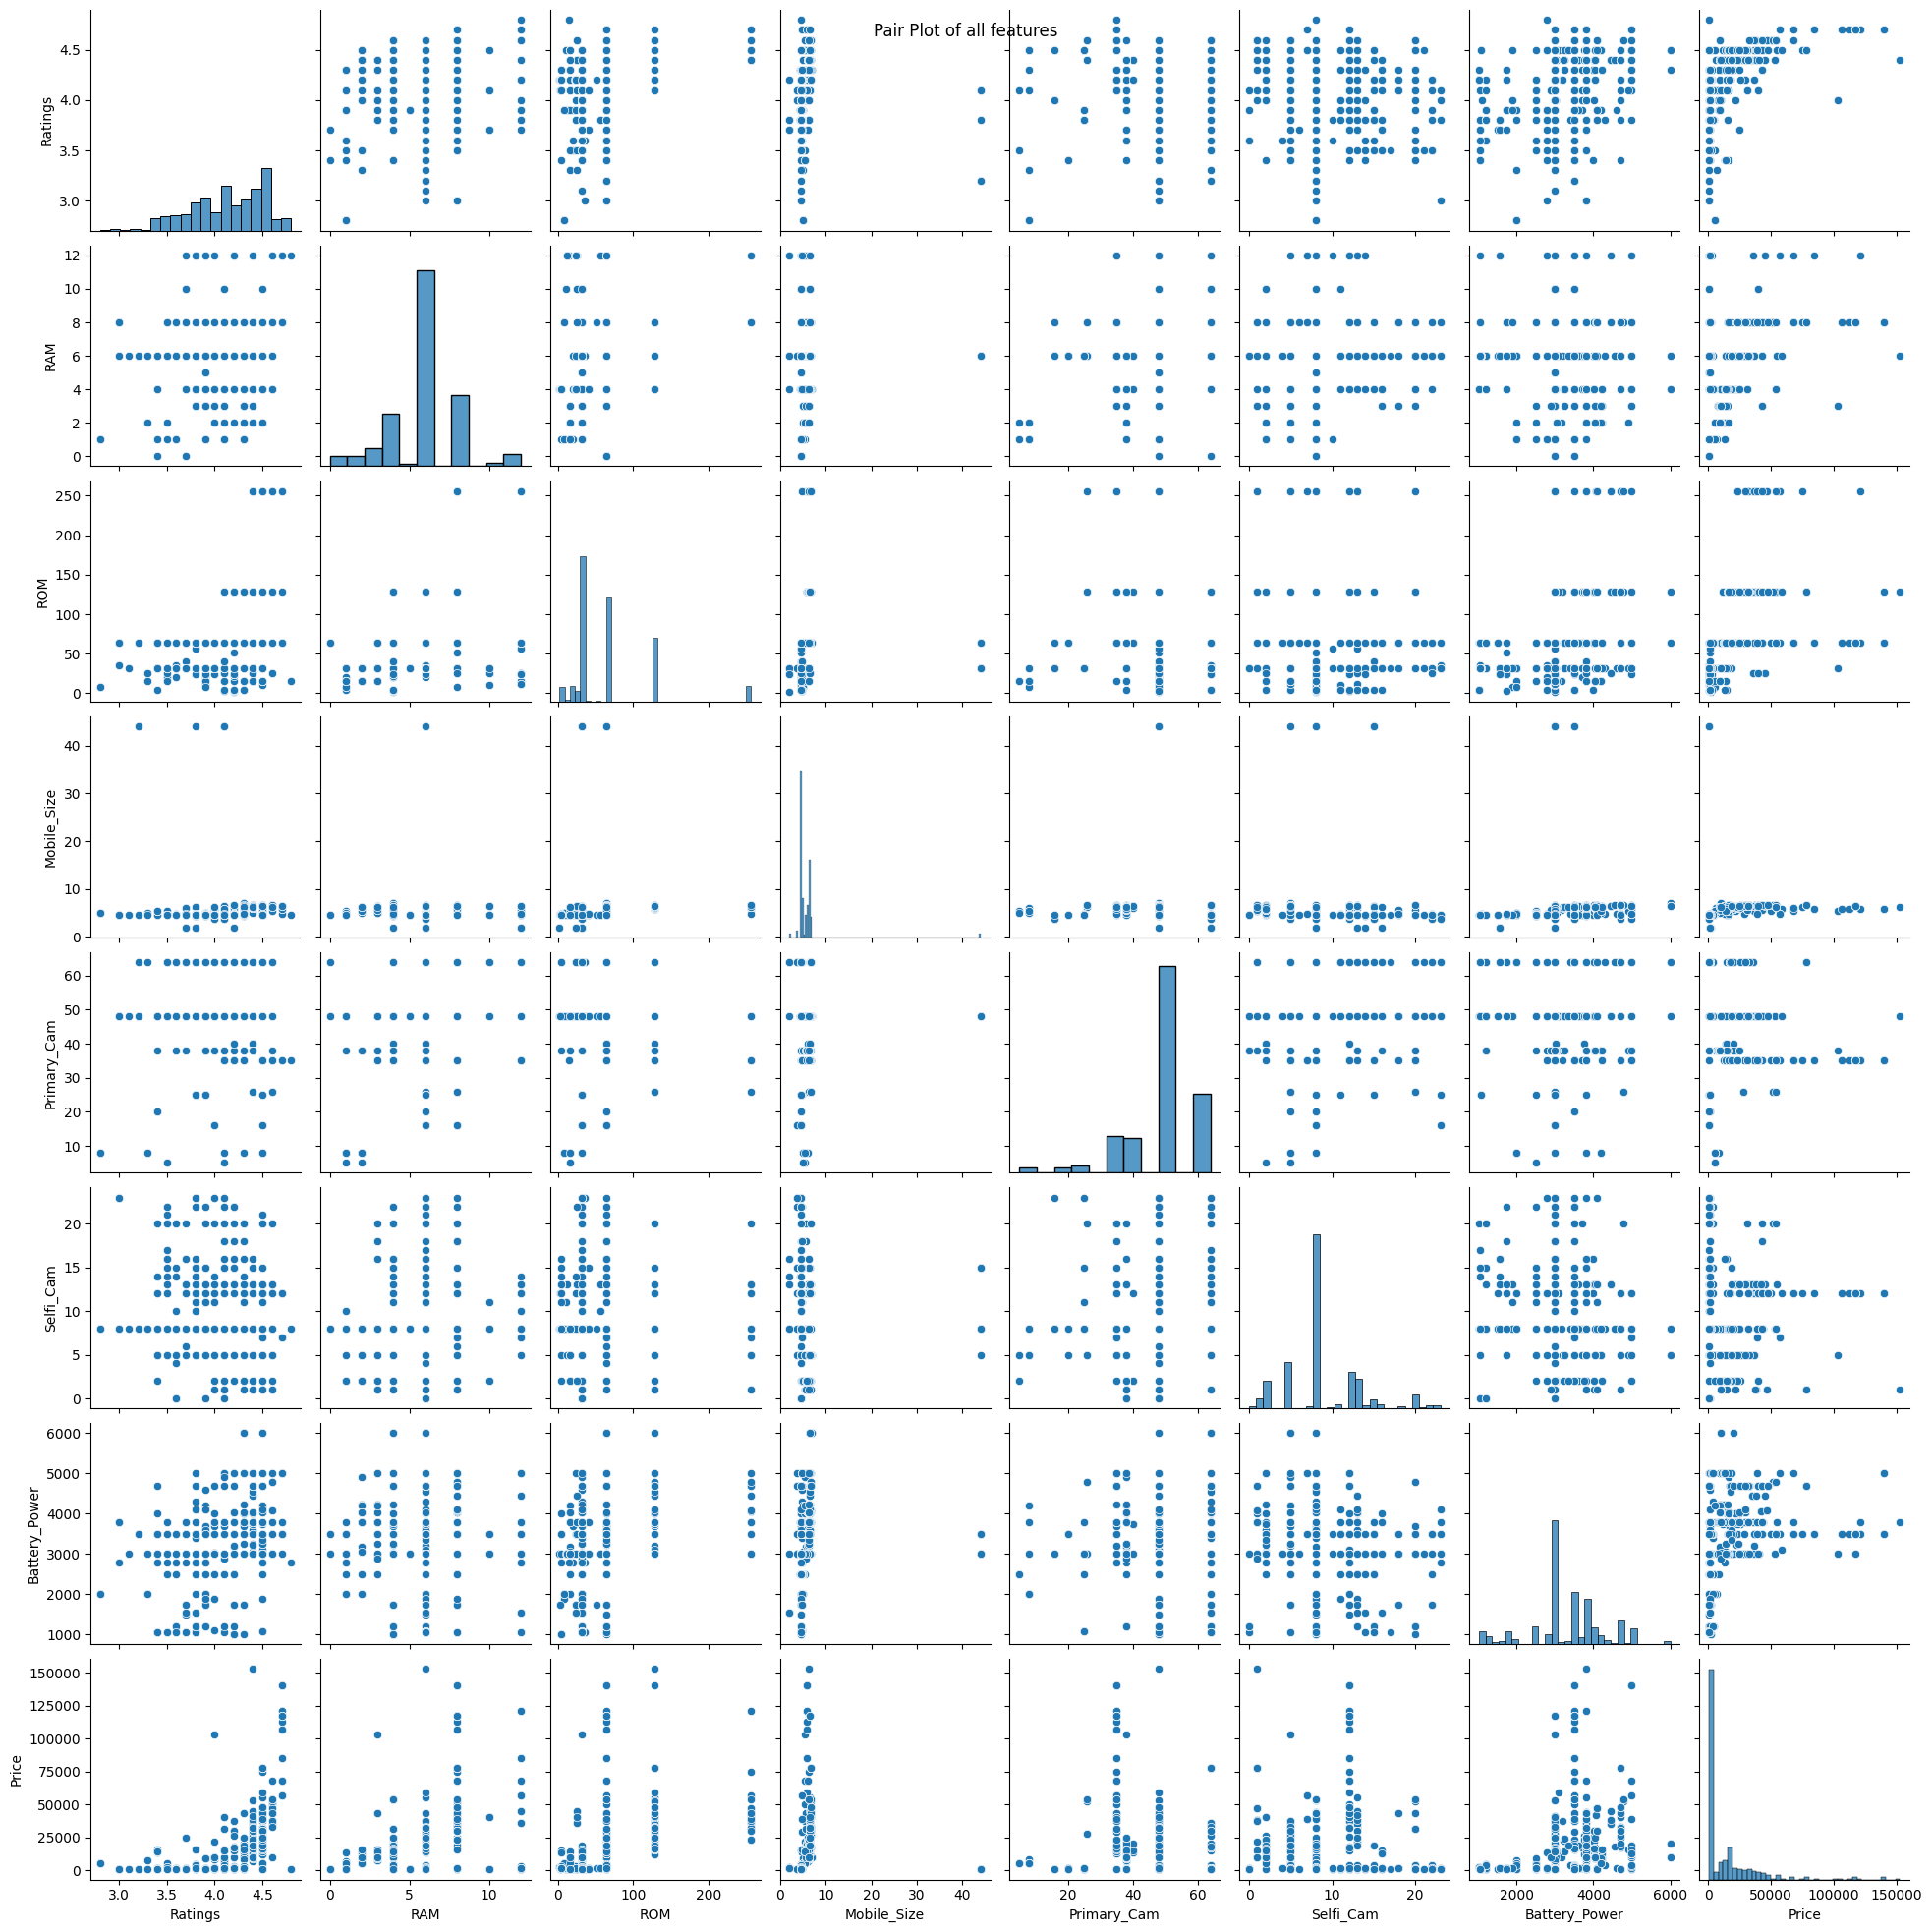

In [10]:
# Scatter plots
sns.pairplot(data)
plt.suptitle("Pair Plot of all features")
plt.show()

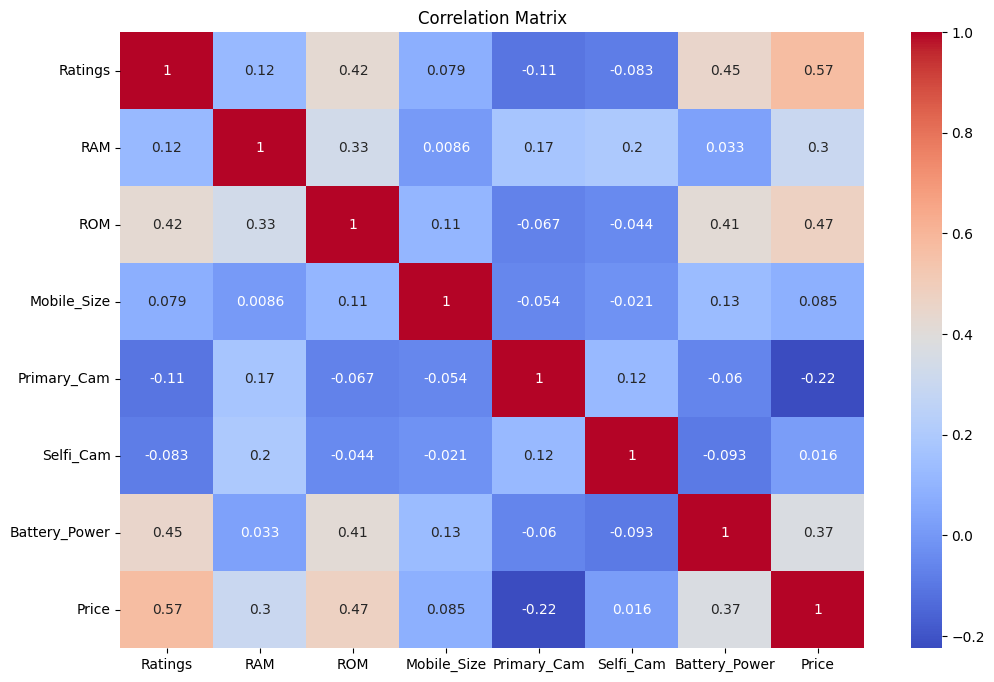

In [11]:
# Feature Correlation
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [12]:
# Feature Engineering
# (Example: assuming we have columns 'int_memory' and 'ram')
# Create a new feature 'total_memory'
if 'int_memory' in data.columns and 'ram' in data.columns:
    data['total_memory'] = data['int_memory'] + data['ram']

In [13]:
# Standardize/Normalize numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

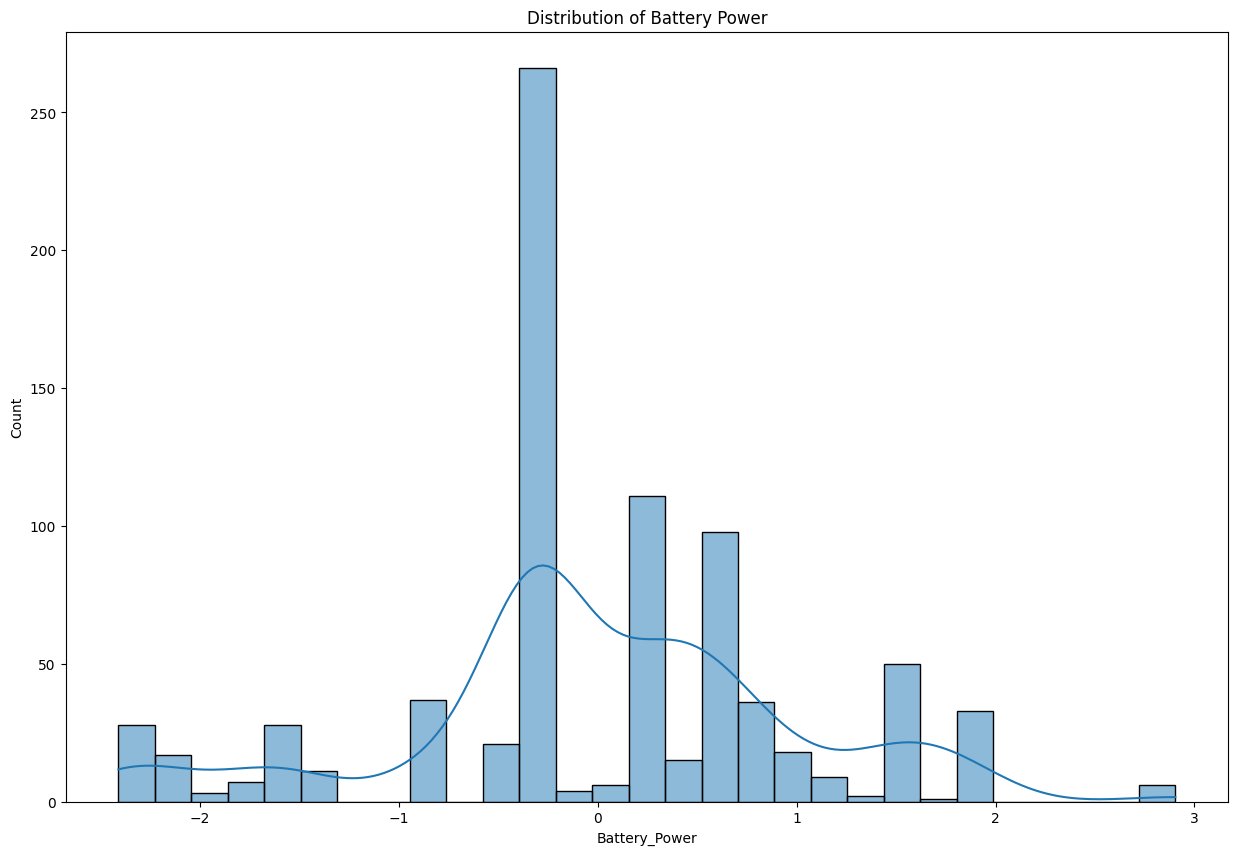

In [15]:
# Exploratory Data Analysis (EDA)
# Distribution Analysis
plt.figure(figsize=(15, 10))
sns.histplot(data['Battery_Power'], kde=True)
plt.title("Distribution of Battery Power")
plt.show()
# Focuses on one feature to understand the spread and identify anomalies

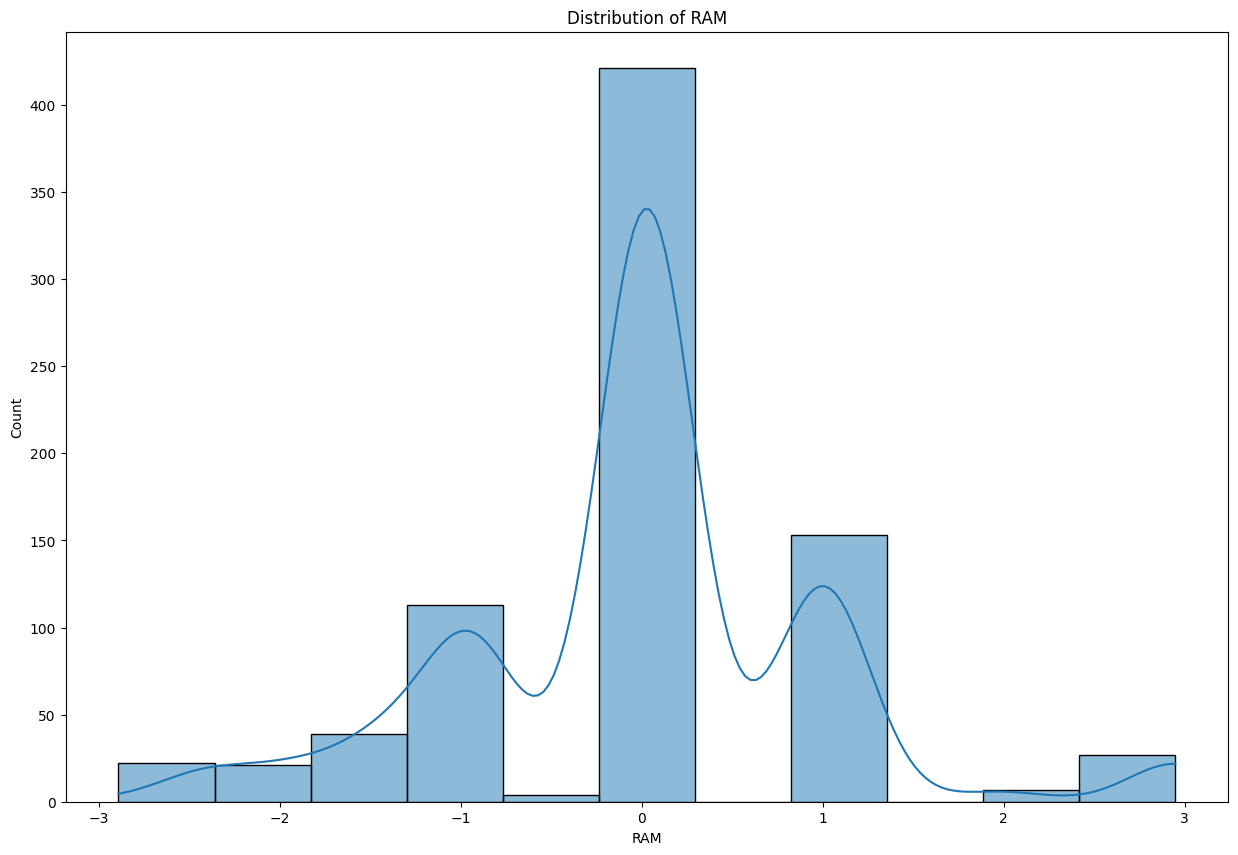

In [17]:
plt.figure(figsize=(15, 10))
sns.histplot(data['RAM'], kde=True)
plt.title("Distribution of RAM")
plt.show()

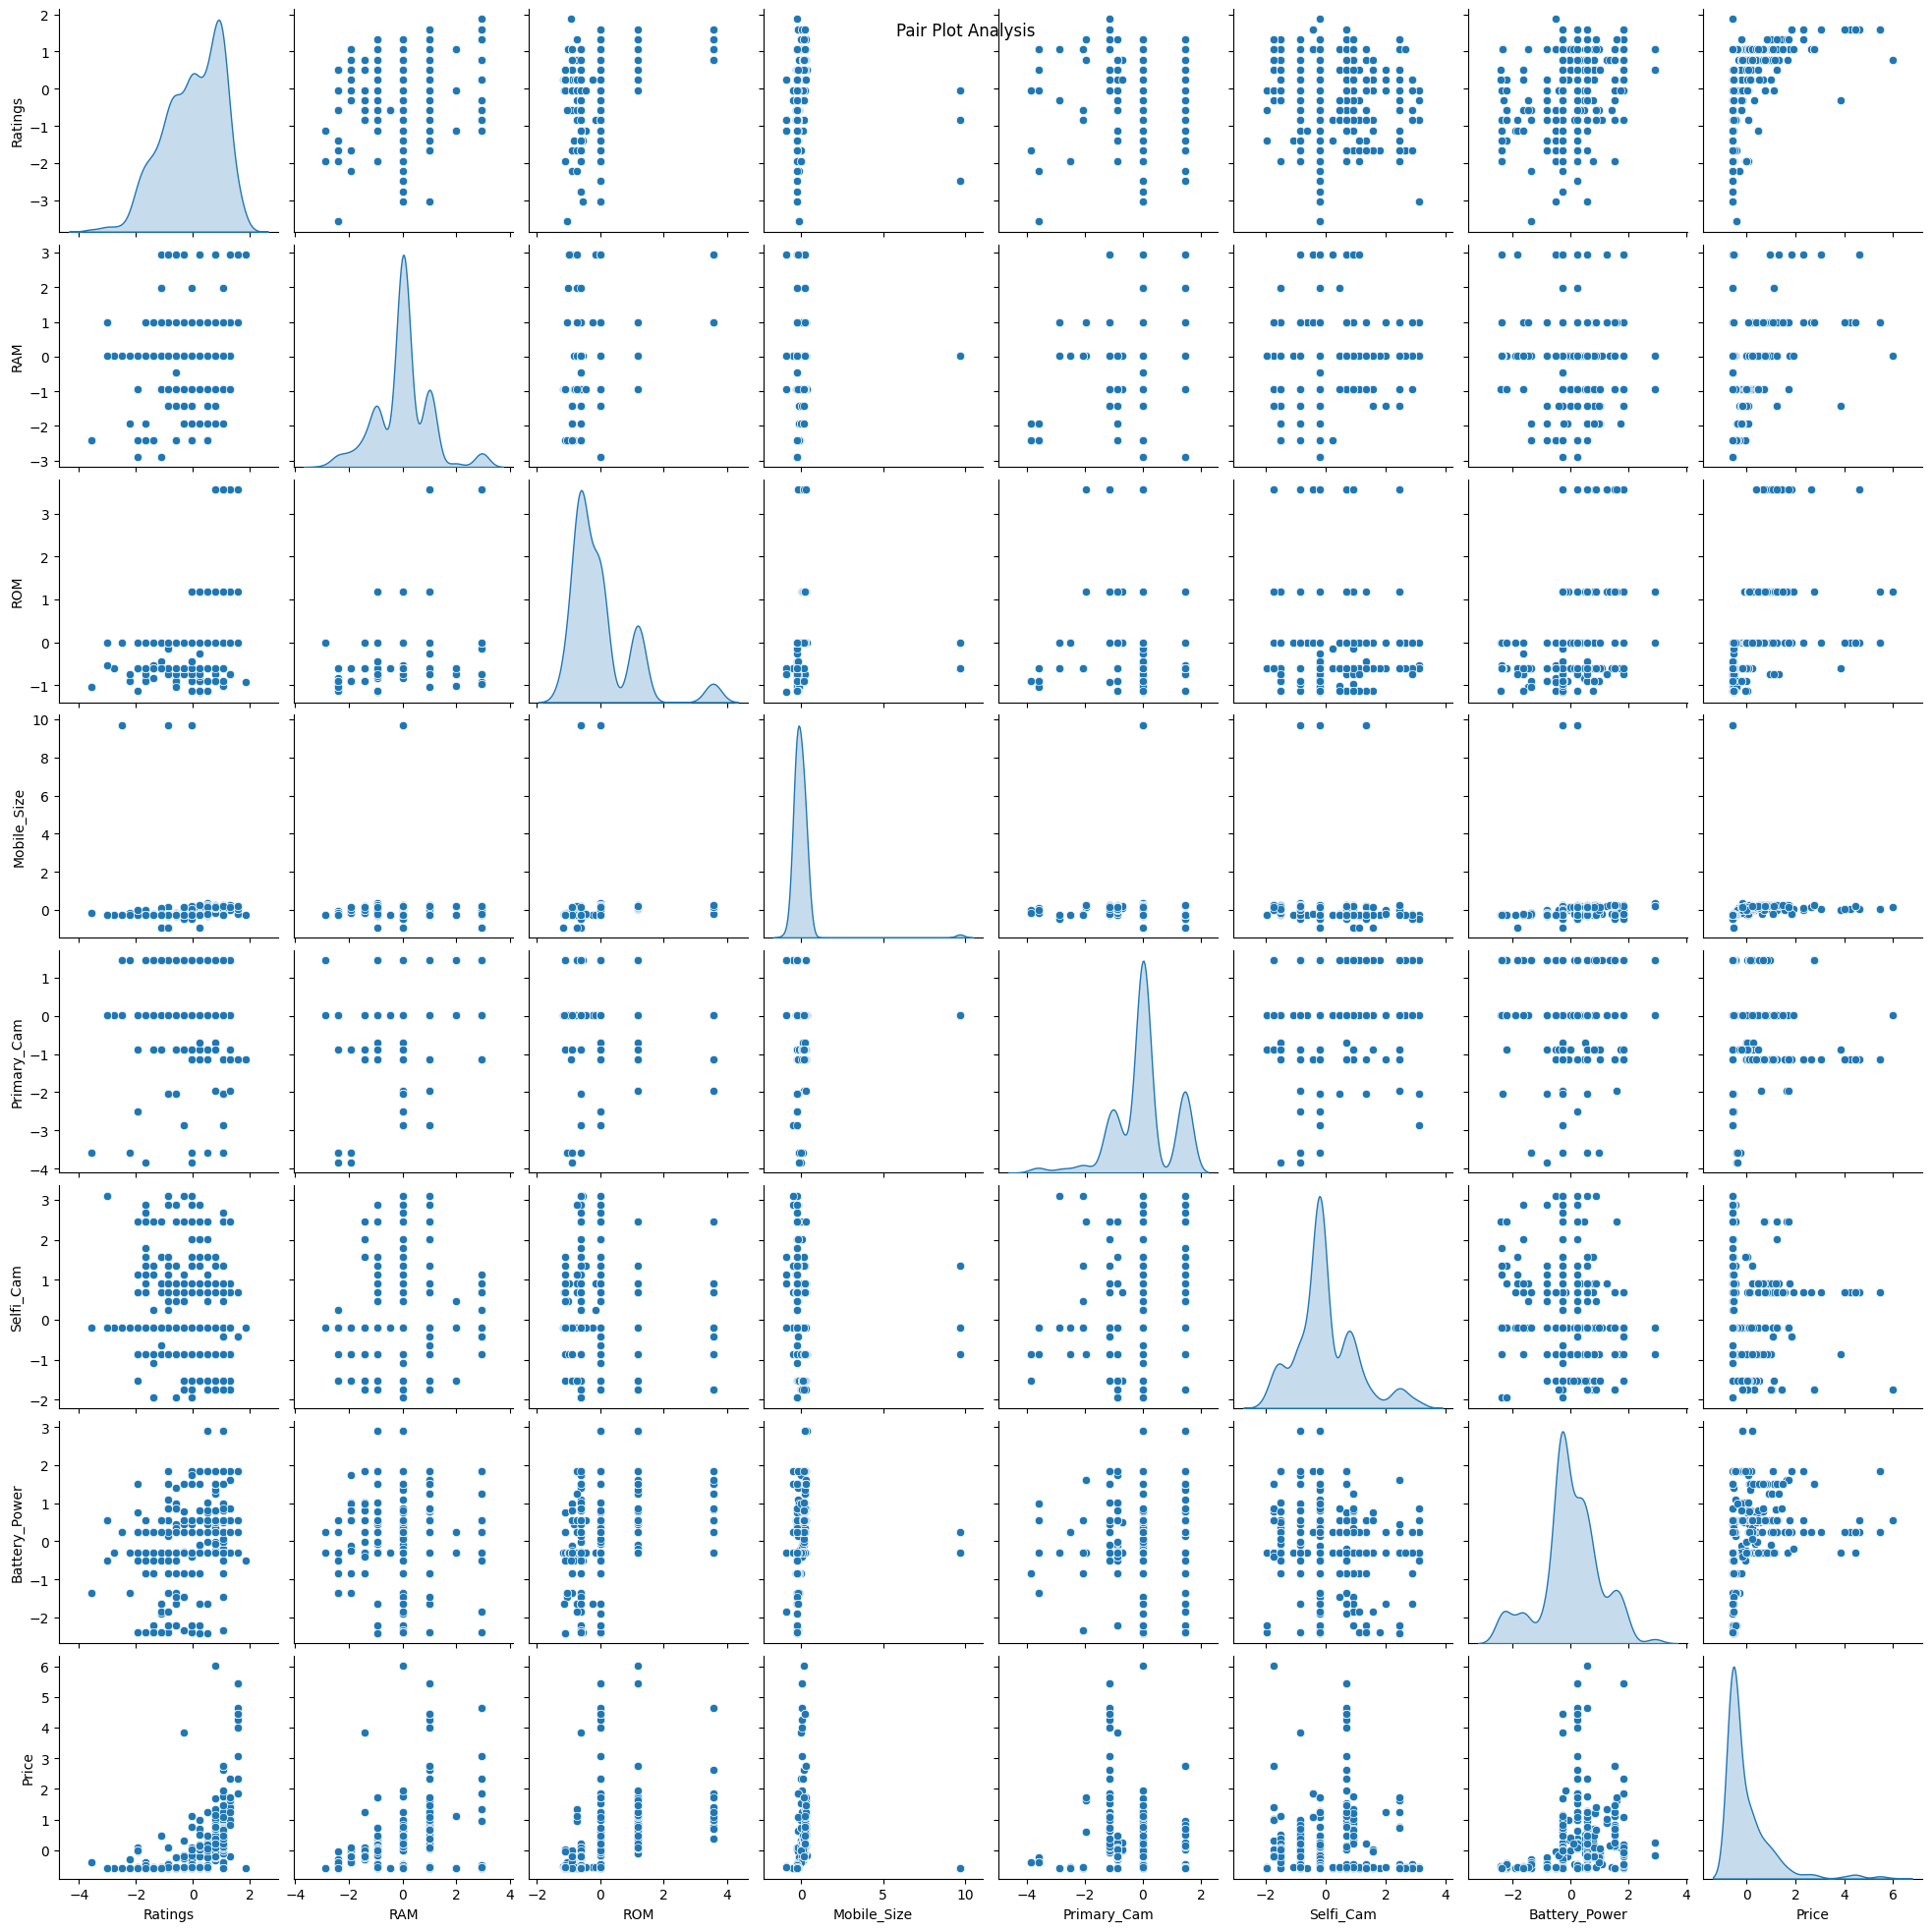

In [18]:
# Pair Plot Analysis
sns.pairplot(data, diag_kind='kde')
plt.suptitle("Pair Plot Analysis")
plt.show()

In [20]:
# Predictive Modeling
# Splitting the dataset into training and testing sets
X = data.drop('Price', axis=1)  # Assuming 'price' is the target variable
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X contains the features, and y contains the target variable (price). Splitting ensures that we can evaluate model performance on unseen data.

In [21]:
# Model Training and Evaluation

# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_lr = linear_regressor.predict(X_test)
print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Performance:
MAE: 0.43354111706857124
MSE: 0.4494018827974347
RMSE: 0.6703744347731607
R2 Score: 0.4332281397209171


In [22]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)
print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
MAE: 0.13800621708094196
MSE: 0.15191853965194013
RMSE: 0.38976728909945757
R2 Score: 0.80840500090156


In [23]:
# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train, y_train)
y_pred_gb = gb_regressor.predict(X_test)
print("Gradient Boosting Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("R2 Score:", r2_score(y_test, y_pred_gb))

# Further steps can include hyperparameter tuning, cross-validation, and deploying the model.


Gradient Boosting Performance:
MAE: 0.14718397490046894
MSE: 0.13204731875185866
RMSE: 0.36338315694574874
R2 Score: 0.8334659747574089


# Insights and Further Actions
- Based on the model evaluations, you can determine which model performs best. Typically, ensemble methods like Random Forest and Gradient Boosting perform better than linear models, especially with complex datasets.

# Most Suitable Method
- Random Forest and Gradient Boosting generally provide better performance due to their ability to handle complex relationships and reduce overfitting.
# Further Actions
- Hyperparameter Tuning: Use techniques like Grid Search or Random Search to find the best parameters for your models.
- Cross-Validation: Implement k-fold cross-validation to ensure your model performs well on different subsets of the data.
- Feature Selection: Use techniques like Recursive Feature Elimination (RFE) or Principal Component Analysis (PCA) to reduce the number of features and improve model performance.
- Model Deployment: Once you have a well-performing model, deploy it using frameworks like Flask or FastAPI to make real-time predictions.
- Business Insights: Translate data findings into actionable business strategies, such as targeted marketing campaigns or product development focus.
- By following these steps, you can leverage data science and machine learning to gain valuable insights into the mobile phone market and make data-driven decisions.
